In [1]:
import spacy 
import numpy as np
import string
import pandas as pd
import random
import seaborn as sns
import re

In [4]:
base_treinamento = pd.read_csv('Train50.csv' , delimiter = ';')

In [5]:
base_treinamento.shape

(50000, 5)

In [7]:
# 0 --> NEGATIVO
# 1 --> POSITIVO

In [6]:
base_treinamento.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [9]:
base_treinamento.tail()

,id,tweet_text,tweet_date,sentiment,query_used
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


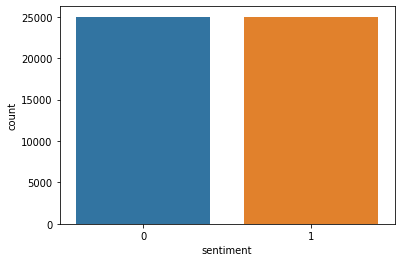

In [11]:
sns.countplot(base_treinamento['sentiment'] , label = 'Contagem');

In [12]:
base_treinamento.drop(['id' , 'tweet_date' , 'query_used'] , axis = 1 , inplace = True)

In [13]:
base_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


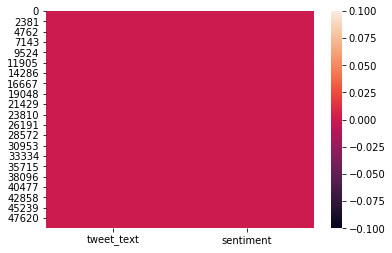

In [22]:
sns.heatmap(pd.isnull(base_treinamento));

In [14]:
base_teste = pd.read_csv('Test.csv' , delimiter = ';')

In [15]:
base_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [16]:
base_teste.tail()

,id,tweet_text,tweet_date,sentiment,query_used
4995,1030528364145201153,@ol_cdanilo parece livro de autoajuda :(,Fri Aug 17 18:54:42 +0000 2018,0,:(
4996,1030528418235015168,@tatazoquita aaaaa sinto muito :((,Fri Aug 17 18:54:55 +0000 2018,0,:(
4997,1030528446122930176,To começando a sentir dor de novo e meu irmão ...,Fri Aug 17 18:55:02 +0000 2018,0,:(
4998,1030528453752352769,@ichbintw parece que no dia que toma a vacina ...,Fri Aug 17 18:55:04 +0000 2018,0,:(
4999,1030528465521586177,@nessagomesc @laymuniz23 poxaa acho q essa q v...,Fri Aug 17 18:55:07 +0000 2018,0,:(


In [17]:
base_teste.shape

(5000, 5)

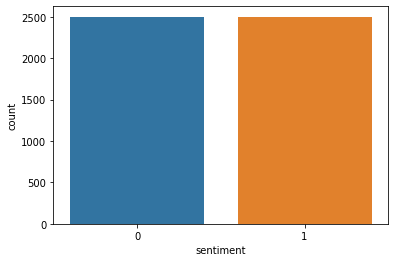

In [19]:
sns.countplot(base_teste['sentiment'] , label = 'Contagem');

In [20]:
base_teste.drop(['id' , 'tweet_date' , 'query_used'] , axis = 1 , inplace = True)

In [21]:
base_teste.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


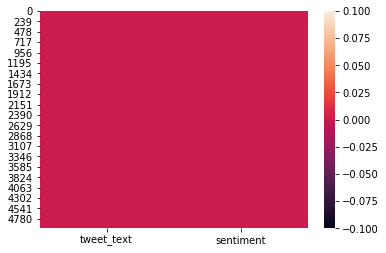

In [23]:
sns.heatmap(pd.isnull(base_teste));

In [24]:
pln = spacy.load('pt')

In [25]:
pln

In [26]:
base_treinamento['tweet_text'][1]

'@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

In [27]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [28]:
stop_words

{'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá',
 'd

In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
def preprocessing(texto):
    
    #Colocando texto em lowercase
    texto = texto.lower()
    #Limpando o nome de usuário
    texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+" , ' ' , texto)
    #Limpando urls
    texto = re.sub(r"https?://[A-Za-z0-9./]+" , ' ' , texto)
    #Limpando espaços em branco
    texto = re.sub(r" +" , ' ' , texto)
    #Limpando emoticons
    lista_emocoes = {':)' : 'emocaopositiva' , ':d' : 'emocaopositiva',':(' : 'emocaonegativa'}
    for emocao in lista_emocoes:
        texto = texto.replace(emocao , lista_emocoes[emocao])
    #Lematização
    documento = pln(texto)
    lista = []
    for token in documento:
        lista.append(token.lemma_)
    #Limpando stop words e pontuação
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
    
    #Reconstruindo a frase
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    
    return lista

In [53]:
texto_teste = '@behin_d_curtain Para :( mim, é http://www.google.com precisamente o contrário :) Vem a chuva e vem a boa disposição :)'
result = preprocessing(texto_teste)
result

'  parir emocaonegativa mim precisamente o contrário emocaopositiva vir o chuva e vir o disposição emocaopositiva'

In [54]:
base_treinamento.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


In [56]:
base_treinamento['tweet_text'] = base_treinamento['tweet_text'].apply(preprocessing)

In [57]:
base_treinamento.head()

,tweet_text,sentiment
0,o pessoa certo parir seriar o valer e azeved...,1
1,parir mim precisamente o contrário emocaopos...,1
2,video hoje ... pensar falar sobrar o meter csg...,1
3,aaaaaaaa amar polaroids expressar o quantum to...,1
4,valorizar o coração menino vc diferente o sorr...,1


In [58]:
base_teste.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


In [59]:
base_teste['tweet_text'] = base_teste['tweet_text'].apply(preprocessing)

In [60]:
base_teste.head()

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir o l...,1
3,vcs ajudar galera pelar amor butera emocaoposi...,1
4,casar zé e o morrer sono chegar o casar e fica...,1


In [62]:
base_dados_treinamento_final = []
for texto, emocao in zip(base_treinamento['tweet_text'], base_treinamento['sentiment']):
    if emocao == 1:
        dic = ({'POSITIVO': True, 'NEGATIVO': False})
    elif emocao == 0:
        dic = ({'POSITIVO': False, 'NEGATIVO': True})

    base_dados_treinamento_final.append([texto, dic.copy()])

In [63]:
len(base_dados_treinamento_final)

50000

In [64]:
base_dados_treinamento_final[11:14]

[['o comedir umar rotina e perfeitamente parir consolidar o escola condução :p',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['amigar parecer apaixonar vc — recíproco emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  gajar bacano aleijar esperar e o silvar feliz emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}]]

In [67]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe('textcat')
categorias.add_label('POSITIVO')
categorias.add_label('NEGATIVO')
modelo.add_pipe(categorias)
historico = []

In [68]:
modelo.begin_training()

for epoca in range(20):
    random.shuffle(base_dados_treinamento_final)
    losses = {}
    for batch in spacy.util.minibatch(base_dados_treinamento_final,256):
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats' : entities} for texto,entities in batch]
        modelo.update(textos, annotations,losses = losses)
        historico.append(losses)
    if(epoca%10 == 0):
        print(losses)

{'textcat': 0.0001089635103238007}
{'textcat': 2.300395121604057e-06}


In [77]:
historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))

In [78]:
historico_loss = np.array(historico_loss)

In [79]:
historico_loss

array([1.08963510e-04, 1.08963510e-04, 1.08963510e-04, ...,
       2.93085305e-06, 2.93085305e-06, 2.93085305e-06])

Text(0, 0.5, 'Erro')

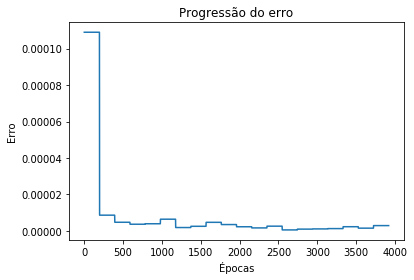

In [80]:
import matplotlib.pyplot as plt 

plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [81]:
modelo.to_disk("modelo_tweets")

In [82]:
modelo_carregado = spacy.load("modelo_tweets")
modelo_carregado

In [83]:
texto_positivo = base_teste['tweet_text'][21]
texto_positivo

'  ficar feliz q recíproco emocaopositiva'

In [84]:
previsao = modelo_carregado(texto_positivo)
previsao

  ficar feliz q recíproco emocaopositiva

In [85]:
previsao.cats

{'POSITIVO': 0.9960654377937317, 'NEGATIVO': 0.004609782248735428}

In [86]:
texto_positivo = 'Eu gosto muito de você'
texto_positivo = preprocessing(texto_positivo)
texto_positivo

'gostar'

In [87]:
modelo_carregado(texto_positivo).cats

{'POSITIVO': 0.002029325347393751, 'NEGATIVO': 0.9954258799552917}

In [88]:
texto_negativo = base_teste['tweet_text'][4000]
texto_negativo

'tô triste filmar mulan o mushu emocaonegativa'

In [89]:
previsao = modelo_carregado(texto_negativo)
previsao

tô triste filmar mulan o mushu emocaonegativa

In [90]:
previsao.cats

{'POSITIVO': 4.539786823443137e-05, 'NEGATIVO': 0.9983978867530823}

In [91]:
previsoes = []
for texto in base_treinamento['tweet_text']:
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [92]:
previsoes_final = []
for previsao in previsoes:
    if previsao['POSITIVO'] > previsao['NEGATIVO']:
        previsoes_final.append(1)
    else:
        previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [93]:
previsoes_final

array([1, 1, 1, ..., 0, 0, 0])

In [94]:
respostas_reais = base_treinamento['sentiment'].values
respostas_reais

array([1, 1, 1, ..., 0, 0, 0])

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.99952

In [96]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[24984,    16],
       [    8, 24992]])

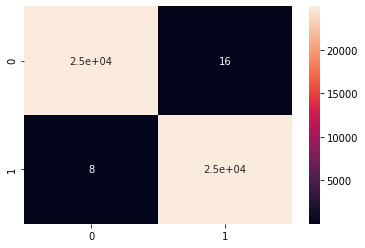

In [97]:
sns.heatmap(cm, annot=True)

In [98]:
previsoes = []
for texto in base_teste['tweet_text']:
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [99]:
previsoes_final = []
for previsao in previsoes:
    if previsao['POSITIVO'] > previsao['NEGATIVO']:
        previsoes_final.append(1)
    else:
        previsoes_final.append(0)
previsoes_final = np.array(previsoes_final)

In [100]:
respostas_reais = base_teste['sentiment'].values

In [101]:
accuracy_score(respostas_reais, previsoes_final)

0.9978

In [102]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2494,    6],
       [   5, 2495]])

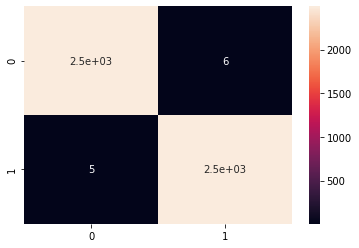

In [103]:
sns.heatmap(cm, annot=True)